# Estudio de Negocio con SQL

## Introducción

Vamos a intentar responder algunas cuestiones de negocio utilizando SQL sobre una base de datos.

Las cuestiones que resolveremos emularán escenarios reales de negocio que podrían darse en cualquier empresa. El primer supuesto, por ejemplo, es que vamos a firmar un contrato con un sello discográfico y nos ofrecen ciertos álbumes para nuestra tienda; nosotros tendremos que elegir cuáles son los adecuados basándonos en los datos que tenemos. 

La base de datos es de una tienda de música digital que lleva poco tiempo en el mercado, y contiene información sobre su actividad, como:

- Datos de los empleados
- Datos de los clientes
- Datos de facturación
- Datos del producto

Intentaremos responder ciertas preguntas sobre el negocio.

## La base de datos

Trabajaremos con una base de datos relacional, llamada *chinook.db*. 

Esta base de datos es pública. Es una base de datos de muestra para SQL Server, Oracle, MySQL, PostgreSQL, SQLite y DB2. Se puede descargar desde GitHub:

https://github.com/lerocha/chinook-database

Los datos sobre las personas (clientes, empleados, teléfonos, direcciones, etc.) son generados de manera aleatoria. 

El contenido multimedia de la base de datos fue creado utilizando datos reales de una librería de iTunes.

Tenemos una imagen de la estructura de la base de datos, que es la siguiente:

<img src="https://s3.amazonaws.com/dq-content/189/chinook-schema.svg">

### Configuración del notebook

Aunque el análisis lo vamos a realizar utilizando SQL, vamos a hacer uso de otras librerías como Pandas, NumPy o Matplotlib para visualizar los resultados.

Vamos a realizar las importaciones y a configurar el entorno de desarrollo para empezar a trabajar.

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

# Creamos la conexión a la base de datos
database = 'chinook.db'
connection = sql.connect(database)

# pandas mostrará todas las columnas si lo deseamos
pd.set_option('display.max_columns', None)

# Evitamos el copyWarning de pandas
pd.options.mode.chained_assignment = None 

# Mostramos gráficos de matplotlib inline
%matplotlib inline

# Centramos los outputs
'''
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}
}
</style>
""")'''

'\nfrom IPython.core.display import HTML\nHTML("""\n<style>\n.output_png {\n    display: table-cell;\n    text-align: center;\n    margin:auto;\n}\n.prompt \n    display:none;\n}\n}\n</style>\n""")'

In [2]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

### Primeras visualizaciones de la base de datos

Vamos a mostrar las tablas de la base de datos:

In [3]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ('table', 'view');

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


Vamos a echar un vistazo a la tabla employee:

In [4]:
%%sql
SELECT * FROM employee;

 * sqlite:///chinook.db
Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2016-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2017-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2017-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


## SUPUESTO 1. Cliente para el mercado de EE.UU.

Supongamos que hemos firmado un contrato con un sello discográfico, y nuestra tarea es seleccionar los dos primeros álbumes que se añadirán a la tienda, de una lista de cuatro. Ninguno de los artistas de los álbumes tiene canciones disponibles en la tienda ahora mismo. Los artistas (y el género musical que producen) son los siguientes:

- Regal, Hip-Hop
- Red Tone, Punk
- Meteor and the Girls, Pop
- Slim Jim Bites, Blues

El sello discográfico se especializa en artistas de los EE.UU. y nos han dado algo de dinero para anunciar los nuevos álbumes en EE.UU., por lo que estamos interesados en averiguar qué géneros vendemos mejor en EE.UU.

Lo primero que vamos a hacer es averiguar cuáles son los géneros más vendidos de la tienda, en todos los países.

In [5]:
%%sql
SELECT
    g.name AS "genero",
    SUM(il.quantity) AS "cantidad"
FROM
    invoice_line AS "il"
INNER JOIN
    track AS "t" ON t.track_id = il.track_id
INNER JOIN
    genre AS "g" ON g.genre_id = t.genre_id
GROUP BY
    genero
ORDER BY
    2 DESC;

 * sqlite:///chinook.db
Done.


genero,cantidad
Rock,2635
Metal,619
Alternative & Punk,492
Latin,167
R&B/Soul,159
Blues,124
Jazz,121
Alternative,117
Easy Listening,74
Pop,63


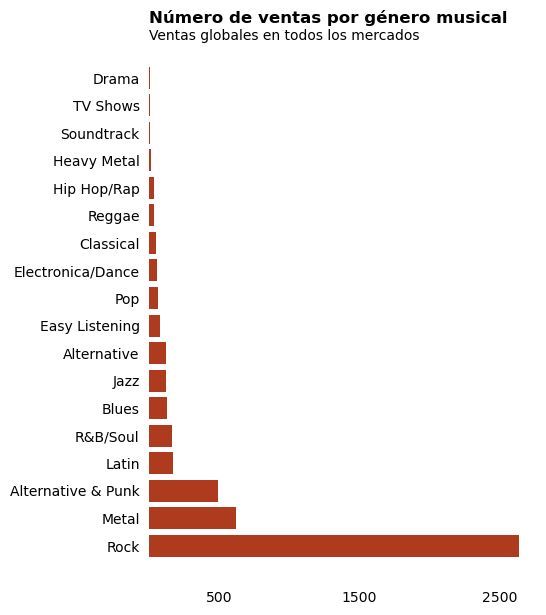

In [6]:
# Vamos a graficar los resultados
plt.style.use('default')

# Leemos la query con Pandas
q1 = '''
    SELECT g.name AS "Género", SUM(il.quantity) AS "cantidad"
      FROM invoice_line AS "il"
INNER JOIN track AS "t" ON t.track_id = il.track_id
INNER JOIN genre AS "g" ON g.genre_id = t.genre_id
  GROUP BY Género ORDER BY 2 DESC;'''
q1_df = pd.read_sql_query(q1, connection)

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(5,7))
ax.barh(q1_df['Género'], q1_df['cantidad'], color='#af3b1e')
ax.text(x=0,y=19, s="Número de ventas por género musical", fontsize=12, weight='bold')
ax.text(x=0, y=18.4, s="Ventas globales en todos los mercados", fontsize=10)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([500,1500,2500])
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
plt.show()

### Géneros más populares en los EE.UU.

Hemos visto que el género más popular de la tienda es por mucho el Rock, pero vamos a verlo para el caso particular de los Estados Unidos, ya que el sello discográfico nos ofrece música para EE.UU.

In [7]:
%%sql

WITH canciones_vendidas_usa AS
    (
    SELECT il.* FROM invoice_line AS "il"
    INNER JOIN invoice AS "i" ON i.invoice_id = il.invoice_id
    INNER JOIN customer AS "c" ON c.customer_id = i.customer_id
    WHERE c.country = "USA"
    )
SELECT
    g.name AS "genero", 
    COUNT(cvu.invoice_line_id) AS "canciones vendidas",
    CAST(COUNT(cvu.invoice_line_id) AS FLOAT)/ (
        SELECT COUNT(*) FROM canciones_vendidas_usa
    ) AS "porcentaje vendido"
FROM canciones_vendidas_usa AS "cvu"
INNER JOIN track AS "t" ON t.track_id = cvu.track_id
INNER JOIN genre AS "g" ON g.genre_id = t.genre_id
GROUP BY 1
ORDER BY 3 DESC;

 * sqlite:///chinook.db
Done.


genero,canciones vendidas,porcentaje vendido
Rock,561,0.5337773549000951
Alternative & Punk,130,0.12369172216936251
Metal,124,0.11798287345385347
R&B/Soul,53,0.05042816365366318
Blues,36,0.03425309229305423
Alternative,35,0.03330161750713606
Pop,22,0.02093244529019981
Latin,22,0.02093244529019981
Hip Hop/Rap,20,0.019029495718363463
Jazz,14,0.013320647002854425


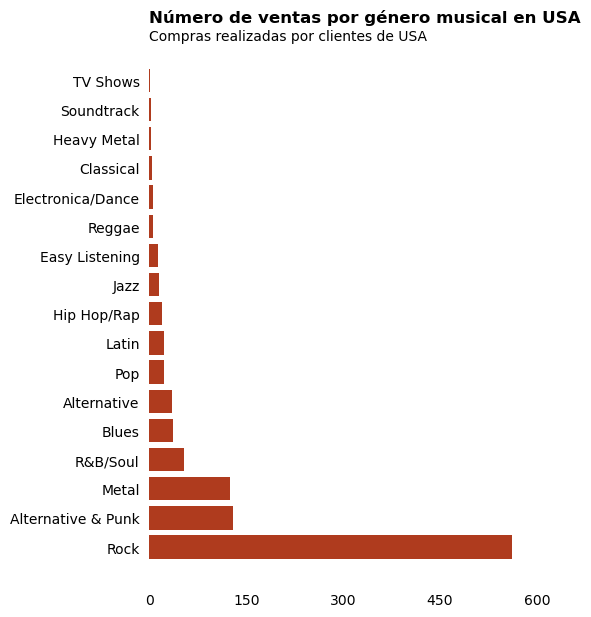

In [8]:
# Vamos a graficar los resultados
plt.style.use('default')

# Leemos la query con Pandas
q2 = '''
    WITH canciones_vendidas_usa AS (SELECT il.* FROM invoice_line AS "il"
    INNER JOIN invoice AS "i" ON i.invoice_id = il.invoice_id
    INNER JOIN customer AS "c" ON c.customer_id = i.customer_id
    WHERE c.country = "USA")
SELECT
    g.name AS "Género", 
    COUNT(cvu.invoice_line_id) AS "canciones vendidas"
FROM canciones_vendidas_usa AS "cvu"
INNER JOIN track AS "t" ON t.track_id = cvu.track_id
INNER JOIN genre AS "g" ON g.genre_id = t.genre_id
GROUP BY 1
ORDER BY 2 DESC;'''

q2_df = pd.read_sql_query(q2, connection)

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(5,7))
ax.barh(q2_df['Género'], q2_df['canciones vendidas'],color='#af3b1e')
ax.text(x=0,y=18, s="Número de ventas por género musical en USA", fontsize=12, weight='bold')
ax.text(x=0, y=17.4, s="Compras realizadas por clientes de USA", fontsize=10)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([0,150,300,450,600])
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
plt.show()

### Conclusiones Supuesto 1

Los cuatro álbumes que nos habían ofrecido eran de los siguientes géneros (artista, género musical):

- Regal, Hip-Hop
- Red Tone, Punk
- Meteor and the Girls, Pop
- Slim Jim Bites, Blues

**Según los datos que tenemos, deberíamos empezar publicando los álbumes de *Red Tone(Punk)* y de *Slim Jim Bites(Blues)*, ya que de los géneros que nos ofrecen, son los que mejor vendemos en EE.UU.**

## SUPUESTO 2. Rendimiento de los empleados de Ventas

A cada cliente de la tienda se le asigna un agente de soporte de ventas dentro de la empresa cuando realiza su primera compra.

Se nos pide que analicemos las compras de los clientes que pertenecen a cada empleado para comprobar si alguno de los agentes de ventas tiene un desempeño mayor que el de los demás.

Los datos que mostraremos serán los siguientes:

- Nombre del empleado
- Fecha de contratación
- Título del empleado
- Ventas totales a los clientes relacionados con el empleado

In [9]:
%%sql
SELECT e.first_name || " " || e.last_name AS "nombre_empleado",
       e.hire_date AS "fecha_contratacion", 
       e.title AS "titulo_empleado",
       ROUND(SUM(i.total)) AS "total_ventas"
FROM employee AS "e"
INNER JOIN customer AS "c" ON c.support_rep_id = e.employee_id    
INNER JOIN invoice AS "i" ON i.customer_id = c.customer_id     
GROUP BY nombre_empleado
ORDER BY total_ventas DESC;    

 * sqlite:///chinook.db
Done.


nombre_empleado,fecha_contratacion,titulo_empleado,total_ventas
Jane Peacock,2017-04-01 00:00:00,Sales Support Agent,1732.0
Margaret Park,2017-05-03 00:00:00,Sales Support Agent,1584.0
Steve Johnson,2017-10-17 00:00:00,Sales Support Agent,1394.0


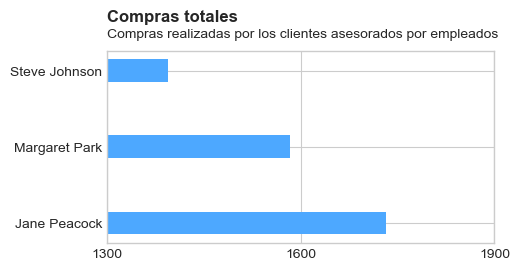

In [10]:
# Vamos a graficar los resultados
plt.style.use('seaborn-whitegrid')

# Leemos la query con Pandas
q3 = '''
SELECT e.first_name || " " || e.last_name AS "nombre_empleado",
       e.hire_date AS "fecha_contratacion", 
       e.title AS "titulo_empleado",
       ROUND(SUM(i.total)) AS "total_ventas"
FROM employee AS "e"
INNER JOIN customer AS "c" ON c.support_rep_id = e.employee_id    
INNER JOIN invoice AS "i" ON i.customer_id = c.customer_id     
GROUP BY nombre_empleado
ORDER BY total_ventas DESC;'''

q3_df = pd.read_sql_query(q3, connection)

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(5,2.5))
ax.barh(q3_df['nombre_empleado'], q3_df['total_ventas'], height=0.3,color='#4DA8FF')
ax.text(x=1300,y=2.65, s="Compras totales", fontsize=12, weight='bold')
ax.text(x=1300, y=2.44, s="Compras realizadas por los clientes asesorados por empleados", fontsize=10)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([1300,1600,1900])
ax.set_xlim(1300,1900)

plt.show()

Jane Peacock es la asesora cuyos clientes han gastado más en nuestra tienda (en términos absolutos), un total de 1732 dólares.

Los clientes de Margaret Park gastaron un total de 1584 dólares, mientras que los de Steve Johnson gastaron 1394 dólares.

La fecha de contratación de los tres empleados fue en el año 2017, en concreto:

- Jane Peacock fue contratada el 01/04/2017
- Margaret Park fue contratada el 03/05/2017
- Steve Johnson fue contratado el 17/10/2017

Para saber el impacto que la antigüedad de los empleados pudiera tener sobre las cantidades gastadas por los clientes, deberíamos conocer en qué fecha se realizó la última venta. 

Vamos a hacer una pequeña consulta para comprobarlo:

In [11]:
%%sql
SELECT invoice_date 
FROM invoice
ORDER BY 1 DESC
LIMIT 3;

 * sqlite:///chinook.db
Done.


invoice_date
2020-12-30 00:00:00
2020-12-29 00:00:00
2020-12-27 00:00:00


La última venta fue el 30/12/2020, por lo que la antigüedad no es un factor determinante (los tres tienen una antigüedad suficiente para desempeñar el trabajo con plena soltura).

Vamos a dividir las ventas totales de cada uno entre los meses que llevan en la empresa, y este dato va a ser más fiable que las ventas totales, teniendo en cuenta que no todos tienen la misma antigüedad. 

Vamos a calcular los periodos con el módulo datetime para obtener la mayor precisión posible.

In [12]:
# Importamos el módulo datetime
import datetime as dt

# Fechas de contratación
fecha_jane = dt.datetime(2017,4,1)
fecha_marg = dt.datetime(2017,5,3)
fecha_stev = dt.datetime(2017,10,17)

# Fecha de la última compra
fecha_ult = dt.datetime(2020,12,30)

# Periodos de tiempo en días
per_jane = (fecha_ult - fecha_jane)
per_marg = (fecha_ult - fecha_marg)
per_stev = (fecha_ult - fecha_stev)

**Ahora que tenemos los periodos, vamos a calcular las medias:**

In [13]:
# Calculamos las medias, dividiendo entre periodos estándares de 30 días (meses)
med_jane = round(1732/per_jane.days*30,2) 
med_marg = round(1584/per_marg.days*30,2)
med_stev = round(1394/per_stev.days*30,2)

med_jane, med_marg, med_stev

(37.95, 35.54, 35.74)

**Compras medias mensuales de los clientes por empleado:** 

- Jane Peacock: 37.95 dólares
- Margaret Park: 35.54 dólares
- Steve Johnson: 35.74 dólares

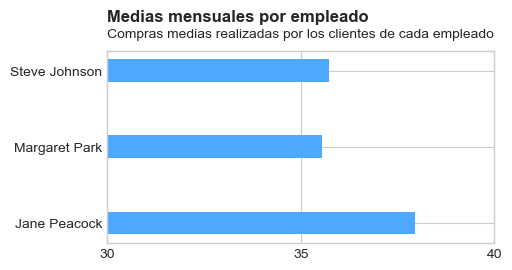

In [14]:
# Graficamos los resultados finales
fig, ax = plt.subplots(figsize=(5,2.5))
ax.barh(q3_df['nombre_empleado'], [med_jane, med_marg, med_stev], height=0.3,color='#4DA8FF')
ax.text(x=30,y=2.65, s="Medias mensuales por empleado", fontsize=12, weight='bold')
ax.text(x=30, y=2.44, s="Compras medias realizadas por los clientes de cada empleado", fontsize=10)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([30,35,40])
ax.set_xlim(30,40)

plt.show()

### Conclusiones Supuesto 2

Tanto en términos relativos como en términos absolutos, Jane Peacock es la Agente de Ventas más productiva de la empresa, aunque los tres parecen desempeñar un buen trabajo (sus números son muy parecidos).

Hemos calculado las compras medias por mes de los clientes en función de cada empleado, y los resultados son los que ya hemos visto:

- **1) Jane Peacock: 37.95 dólares mensuales de media**
- **2) Steve Johnson: 35.74 dólares mensuales de media**
- **3) Margaret Park: 35.54 dólares mensuales de media**

## Supuesto 3. Buscando países con oportunidades de negocio 

Lo siguiente que vamos a analizar son los datos de los clientes por países, para comprobar **si hay alguna oportunidad de negocio en algún país.**

Concretamente, vamos a calcular directamente (por país) los siguientes aspectos:

- Número total de clientes
- Valor total de ventas
- Valor medio de compra por cliente
- Número medio de compras

In [15]:
%%sql
SELECT
    c.country AS "pais",
    COUNT(DISTINCT c.customer_id) AS "clientes_totales",
    SUM(il.unit_price) AS "valor_total_ventas",
    SUM(il.unit_price)/COUNT(DISTINCT il.invoice_id) AS "compra_media",
    CAST((COUNT(DISTINCT il.invoice_id))/COUNT(DISTINCT c.customer_id) AS FLOAT) AS "num_medio_compras",
    SUM(il.unit_price)/COUNT(DISTINCT c.customer_id) AS "gasto_medio_cliente"
FROM
    customer AS "c"
INNER JOIN
    invoice AS "i" ON i.customer_id = c.customer_id
INNER JOIN
    invoice_line AS "il" ON il.invoice_id = i.invoice_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 9;        

 * sqlite:///chinook.db
Done.


pais,clientes_totales,valor_total_ventas,compra_media,num_medio_compras,gasto_medio_cliente
USA,13,1040.490000000008,7.942671755725252,10.0,80.03769230769292
Canada,8,535.5900000000034,7.047236842105309,9.0,66.94875000000043
France,5,389.0700000000021,7.781400000000042,10.0,77.81400000000042
Brazil,5,427.68000000000245,7.011147540983647,12.0,85.53600000000048
Germany,4,334.6200000000016,8.161463414634186,10.0,83.6550000000004
United Kingdom,3,245.52000000000078,8.768571428571457,9.0,81.84000000000026
Portugal,2,185.13000000000022,6.3837931034482835,14.0,92.56500000000011
India,2,183.1500000000002,8.72142857142858,10.0,91.5750000000001
Czech Republic,2,273.24000000000103,9.108000000000034,15.0,136.62000000000052


**Los países con un solo cliente los vamos a agrupar en un nuevo grupo llamado *Otro*, y vamos a ordenar por la compra media por cliente:**

In [16]:
%%sql
SELECT
    CASE
        WHEN (
              SELECT COUNT(*)
              FROM customer
              WHERE country = c.country
              ) = 1 THEN "Otro"
        ELSE c.country
    END AS "pais",
    COUNT(DISTINCT c.customer_id) AS "clientes_totales",
    SUM(il.unit_price) AS "valor_total_ventas",
    SUM(il.unit_price)/COUNT(DISTINCT il.invoice_id) AS "compra_media",
    CAST((COUNT(DISTINCT il.invoice_id))/COUNT(DISTINCT c.customer_id) AS FLOAT) AS "num_medio_compras",
    SUM(il.unit_price)/COUNT(DISTINCT c.customer_id) AS "valor_medio_cliente"
FROM
    customer AS "c"
INNER JOIN
    invoice AS "i" ON i.customer_id = c.customer_id
INNER JOIN
    invoice_line AS "il" ON il.invoice_id = i.invoice_id
GROUP BY 1
ORDER BY 4 DESC;

 * sqlite:///chinook.db
Done.


pais,clientes_totales,valor_total_ventas,compra_media,num_medio_compras,valor_medio_cliente
Czech Republic,2,273.24000000000103,9.108000000000034,15.0,136.62000000000052
United Kingdom,3,245.52000000000078,8.768571428571457,9.0,81.84000000000026
India,2,183.1500000000002,8.72142857142858,10.0,91.5750000000001
Germany,4,334.6200000000016,8.161463414634186,10.0,83.6550000000004
USA,13,1040.490000000008,7.942671755725252,10.0,80.03769230769292
France,5,389.0700000000021,7.781400000000042,10.0,77.81400000000042
Otro,15,1094.9400000000085,7.448571428571486,9.0,72.99600000000056
Canada,8,535.5900000000034,7.047236842105309,9.0,66.94875000000043
Brazil,5,427.68000000000245,7.011147540983647,12.0,85.53600000000048
Portugal,2,185.13000000000022,6.3837931034482835,14.0,92.56500000000011


In [17]:
# Vamos a graficar los resultados

# Leemos la query con Pandas
q4 = '''
SELECT
    CASE
        WHEN (
              SELECT COUNT(*)
              FROM customer
              WHERE country = c.country
              ) = 1 THEN "Otro"
        ELSE c.country
    END AS "pais",
    COUNT(DISTINCT c.customer_id) AS "clientes_totales",
    SUM(il.unit_price) AS "valor_total_ventas",
    SUM(il.unit_price)/COUNT(DISTINCT il.invoice_id) AS "compra_media",
    CAST((COUNT(DISTINCT il.invoice_id))/COUNT(DISTINCT c.customer_id) AS FLOAT) AS "num_medio_compras",
    SUM(il.unit_price)/COUNT(DISTINCT c.customer_id) AS "valor_medio_cliente"
FROM
    customer AS "c"
INNER JOIN
    invoice AS "i" ON i.customer_id = c.customer_id
INNER JOIN
    invoice_line AS "il" ON il.invoice_id = i.invoice_id
GROUP BY 1
ORDER BY 4 DESC;
'''

q4_df = pd.read_sql_query(q4, connection)

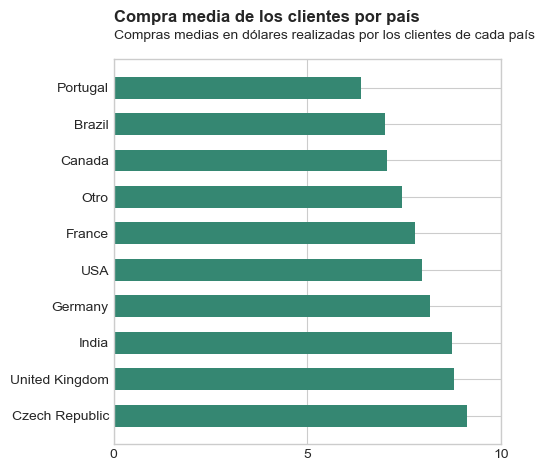

In [18]:
# RESULTADOS COMPRA MEDIA
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(5,5))
ax.barh(q4_df['pais'], q4_df['compra_media'],height=0.6,color='#358772')
ax.text(x=0,y=10.8, s="Compra media de los clientes por país", fontsize=12, weight='bold')
ax.text(x=0, y=10.35, s="Compras medias en dólares realizadas por los clientes de cada país", fontsize=10)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([0,5,10])
ax.set_xlim(0,10)

plt.show()

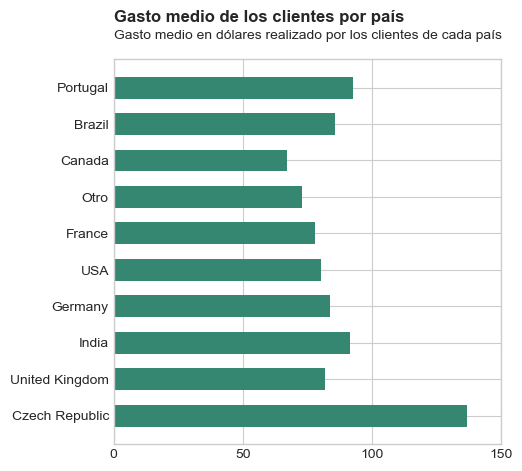

In [19]:
# RESULTADOS VALOR POR CLIENTE
fig, ax = plt.subplots(figsize=(5,5))
ax.barh(q4_df['pais'], q4_df['valor_medio_cliente'],height=0.6,color='#358772')
ax.text(x=0,y=10.8, s="Gasto medio de los clientes por país", fontsize=12, weight='bold')
ax.text(x=0, y=10.35, s="Gasto medio en dólares realizado por los clientes de cada país", fontsize=10)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([0,50,100,150])
ax.set_xlim(0,150)

plt.show()

### Conclusiones Supuesto 3

República Checa tiene el gasto medio más alto por cliente, y la compra media más elevada.

Los clientes de India y Reino Unido también son interesantes, ya que la compra media de los clientes de éstas nacionalidades es superior a le media, mientras que el gasto medio está o en la media o por encima de ella.

**Existen oportunidades de negocio en:**
- **República Checa**
- **Reino Unido**
- **India**

## Supuesto 4. Nuevas estrategias de compra para ahorrar costes

La tienda está configurada de tal manera que permite al cliente realizar compras de las dos formas siguientes:

- Comprar un álbum completo
- Comprar una colección de una o más pistas individuales

La tienda no permite que el cliente compre un álbum completo y que se agreguen pistas individuales a esa misma compra. Cuando los clientes compran álbumes, se les cobra el mismo precio que si hubiesen elegido las pistas que componen el álbum de forma individual.

Se está considerando cambiar la estrategia de compras para ahorrar costes, que consiste en comprar solamente las pistas más populares de cada álbum a las compañías discográficas, en lugar de todas las pistas del álbum completo.

**Se nos pide:**

- Averiguar qué porcentaje de las compras son pistas individuales frente a álbumes completos

Para responder a esto, debemos identificar si cada factura contiene todas las pistas de un álbum. Podemos hacer esta operación obteniendo la lista de pistas de la factura y comparándola con la lista de pistas de un álbum. 

Podemos encontrar el álbum con el que comparar la compra buscando el álbum al que pertenece una de las pistas compradas. 
No importa qué pista elijamos, ya que si es la compra de un álbum, ese álbum será el mismo para todas las pistas.

In [20]:
%%sql

WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id AS "invoice_id",
         MIN(il.track_id) AS "first_track_id"
     FROM invoice_line AS "il"
     GROUP BY 1
    )

SELECT
    album_completo,
    COUNT(invoice_id) AS "numero_facturas",
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) AS "porcentaje"
FROM
    (
    SELECT
        ifs.*,
        CASE
            WHEN
                 (
                  SELECT t.track_id FROM track AS "t"
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track AS "t2"
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 

                  EXCEPT 

                  SELECT il2.track_id FROM invoice_line AS "il2"
                  WHERE il2.invoice_id = ifs.invoice_id
                 ) IS NULL
             AND
                 (
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id

                  EXCEPT 

                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 
                 ) IS NULL
             THEN "Si"
             ELSE "No"
         END AS "album_completo"
     FROM invoice_first_track ifs
    )
GROUP BY album_completo;

 * sqlite:///chinook.db
Done.


album_completo,numero_facturas,porcentaje
No,500,0.8143322475570033
Si,114,0.18566775244299674


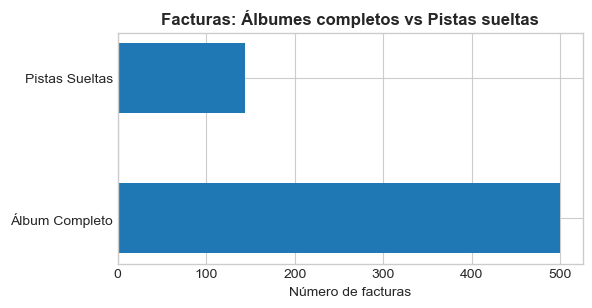

In [21]:
# Graficamos los resultados
plt.figure(figsize=(6,3))
plt.barh(["Álbum Completo", "Pistas Sueltas"], [500,144], height=0.5)
plt.title("Facturas: Álbumes completos vs Pistas sueltas", weight='bold')
plt.xlabel("Número de facturas")
plt.show()

### Conclusiones Supuesto 4

De las 614 facturas que tenemos:

- El 18.56% de las compras fueron álbumes completos (114 facturas en total)
- El 81.43% de las compras fueron pistas sueltas (500 facturas en total)

**El 81.43% de las compras totales realizadas en nuestra tienda fueron de pistas sueltas, mientras que el 18.56% fueron álbumes completos. Uno de cada cinco clientes compra álbumes completos en la tienda, por lo que cambiar la política de compras tal y como propone la gerencia no sería una buena decisión.**

**NUESTRA RECOMENDACIÓN:**

Permitir a los clientes comprar de manera más flexible, de manera que si quieren comprar un álbum completo y además agregar pistas a esa misma compra, puedan hacerlo.

Desde el punto de vista del cliente, es posible que al comprar un álbum completo, tener que pagar y luego volver a comprar las pistas sueltas, se pierdan ventas que de haber existido la posibilidad que proponemos no se habrían perdido.